In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = open('../data/normalized_poems.txt',  encoding="utf-8").read()

# Lowercase and split the text
corpus = data.split("\n")

# Preview the result
print(corpus)
print(len(corpus))

['መዘንጋት ባለበት በታናሽ ህሊና', 'መዘመር ልጀምር ለድንግል ምሥጋና', 'እኔሥ በውዳሤሽ ባህር እዋኛለሁ', 'ገናንነትሽን ክብርሽን እያሠብኩ', 'የትህትናሽ ነገር ቢወሣ አያልቅም', 'ታነቢያለሽና ለዚህ ክፉ አለም', 'ድንግል ሆይ ለሀጥአን ታሥቢያለሽና', 'ልቦናዬ ባንቺ በምልጃሽ ተፅናና', 'ማርያም ሆይ ሥለዚህ እንወድሻለን', 'አንቺን ተማፅነናል እንድታማልጂን', 'ዘወትር እጆችሽ ተዘርግተዋልና', 'ሥለበደለኞች ሊያቀርቡ ልመና', 'እሣትአውያኑ ሡራፌል ኪሩቤል', 'ሊነኩት ያልቻሉት የእሣቱን ነበልባል', 'አንቺ ግን ታቀፍሽው ሣምሽው በከንፈርሽ', 'ከፍጥረት ለይቶ ፍፁም ሥላፀናሽ', 'ማርያም ሆይ ሥለዚህ እንወድሻለን', 'አንቺን ተማፅነናል', 'ዘወትር እጆችሽ ተዘርግተዋልና', 'ሥለበደለኞች ሊያቀርቡ ልመና', 'መድሀኔአለም የለም የሚሣነው', 'አማኑኤል የለም የሚሣነው', 'እርሡ ቃል ሢናገር ተራራው ሜዳ ነው', 'መድሀኔአለም የለም የሚሣነው', 'አላሥብም አልፈዋለሁ ብዬ', 'ጉንጭ አልፎ ትራሤን እያጠበ እንባዬን', 'እየተፈጸመ ሀይሉ በድካሜ', 'ማእበሉን አለፍኩኝ ቀለለልኝ ሸክሜ', 'የቤቴ እራሥ ነው የእቅዴ መሪ', 'በክፉም በደጉም ነፍሤን አሥተማሪ', 'ፈጥሮ የማይረሣኝ ቤዛዬ ደረሠ', 'ቤቴን ደሥታ ሞላው እንባዬ ታበሠ', 'ትናንት ባዶ ነበር የለኝ የሚሠፈር', 'አንዳች አልነበረኝ የሚታይ የሚቆጠር', 'ከርሡ የተነሣ ዛሬ ግን ሙሉ ነኝ', 'ክብር ለእርሡ ይሁን አለ የማይተወኝ', 'እየከለከለ ለእኔ ማይጠቅመኝን', 'በጊዜ እየሠጠ ደግሞ የሚረባኝን', 'ሁሉ በእርሡ ሆኗል አልሆነም ያለ እርሡ', 'ውዳሤ ምሥጋና ይድረሥ ለንጉሡ', 'እግዚአብሄርን አመሥግኑት', 'ሥራህ ግሩም ድንቅ ነው በሉት', 'ሠማይን ያለምሠሦ', 'ምድርንም ያለ መሠረት', 'ያጸና

In [3]:
# Initialize the vectorization layer
vectorize_layer = tf.keras.layers.TextVectorization()

# Build the vocabulary
vectorize_layer.adapt(corpus)

In [4]:
# Get the vocabulary and its size
vocabulary = vectorize_layer.get_vocabulary()
vocab_size = len(vocabulary)

print(f'{vocabulary}')
print(f'{vocab_size}')

['', '[UNK]', 'ነው', 'ላይ', 'እንደ', 'ወደ', 'ግን', 'ጌታ', 'እኔ', 'አምላክ', 'ምን', 'ሁሉ', 'ብሎ', 'ሠው', 'ሆይ', 'ነበር', 'ድንግል', 'አለ', 'እንዴት', 'ሥለ', 'ጊዜ', 'ክርሥቶሥ', 'አንተ', 'እያለ', 'እግዚአብሄር', 'ነኝ', 'ሁሉን', 'ፍቅር', 'አንድ', 'ዛሬ', 'ቃል', 'ጋር', 'ይኸው', 'አለም', 'ልጅ', 'ነገር', 'ሆኖ', 'ዛሬም', 'እውነት', 'እኛ', 'ደሥ', 'አዳም', 'ሁሉም', 'ዘመን', 'ክብር', 'ኢየሡሥ', 'ንጉሥ', 'ሥም', 'እሡ', 'አንቺ', 'አባት', 'አለኝ', 'ቤት', 'ያለ', 'ከቶ', 'እንኳን', 'በእውነት', 'ቅዱሥ', 'ሣለ', 'ማን', 'ማነው', 'መሥቀል', 'ለምን', 'ህይወት', 'ደም', 'እናት', 'እባክህ', 'እርሡ', 'አመት', 'ናት', 'በጣም', 'ሥቡህ', 'መች', 'ይቅር', 'የሠው', 'ዝም', 'እሥከ', 'ነበረ', 'በመሥቀል', 'ቀን', 'መቼ', 'ጊዮርጊሥ', 'ደሥታ', 'ይህን', 'ይህ', 'ያለው', 'እናቴ', 'ብዙ', 'ሠማይ', 'ምንም', 'ማርያም', 'ሆነ', 'ዲያብሎሥ', 'ያ', 'የአለም', 'እኮ', 'እናቱ', 'እሣት', 'ተሥፋ', 'ብርሀን', 'በፍቅር', 'በአንድ', 'ሥሙ', 'ሠዎች', 'ሠአት', 'መጣ', 'መንፈሥ', 'ፍጥረት', 'ፀሀይ', 'ዮናሥ', 'ከላይ', 'እና', 'አለው', 'አሁን', 'ብዬ', 'ብቻ', 'በሠማይ', 'ሥፍራ', 'ሠላም', 'ሞትን', 'ምድር', 'ምሥጉን', 'ልጆች', 'ልክ', 'ፈጣሪ', 'ድንቅ', 'ያኔ', 'ውሀ', 'እጅግ', 'እያሉ', 'እኛን', 'እንዲህ', 'አቤት', 'አባ', 'አምሥቱ', 'አምላክን', 'አምላኬ', 'ነሽ', 'ነህ', 'ብለው', 'ሥር', 'ሞት', 'መከራ', 'መላእክት', 'ሀጢአት',

In [5]:
# Initialize the sequences list
input_sequences = []

for line in corpus:
    # Generate the integer sequence of the current line
	sequence = vectorize_layer(line).numpy()

    # Loop over the line several times to generate the subphrases
	for i in range(1, len(sequence)):
        # Generate the subphrase
		n_gram_sequence = sequence[:i+1]

		# Append the subphrase to the sequences list
		input_sequences.append(n_gram_sequence)


# Get the length of the longest line
max_sequence_len = max([len(x) for x in input_sequences])

# Pad all sequences
input_sequences = np.array(tf.keras.utils.pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create inputs and label by splitting the last token in the subphrases
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

# Convert the label into one-hot arrays
ys = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

In [7]:
# Get sample sentence
sentence = corpus[1000].split()
print(f'sample sentence: {sentence}')

# Initialize token list
token_list = []

# Look up the indices of each word and append to the list
for word in sentence:
  token_list.append(vocabulary.index(word))

# Print the token list
print(token_list)

sample sentence: ['የዳንኤል', 'አጽናኝ', 'የአፎምያ', 'ረዳት']
[3112, 1471, 1195, 900]


In [8]:
def sequence_to_text(sequence, vocabulary):
  '''utility to convert integer sequence back to text'''

  # Loop through the integer sequence and look up the word from the vocabulary
  words = [vocabulary[index] for index in sequence]

  # Combine the words into one sentence
  text = tf.strings.reduce_join(words, separator=' ').numpy().decode()

  return text

In [9]:
# Pick element
elem_number = 120

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {sequence_to_text(xs[elem_number], vocabulary)}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [  0   0   0   0   0   0   0   0 414 218 125]
decoded to text:         ሥራህ ግሩም ድንቅ
one-hot label: [0. 0. 1. ... 0. 0. 0.]
index of label: 2


In [11]:
# Pick element
elem_number = 841

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {sequence_to_text(xs[elem_number], vocabulary)}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [   0    0    0    0    0    0    0    0    0 1816 2662]
decoded to text:          ቅሉ ደረቀና
one-hot label: [0. 0. 0. ... 0. 0. 0.]
index of label: 1577


In [12]:
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE
BATCH_SIZE = 64
# Set the random seed for reproducibility

# Put the inputs and labels to a tf.data.Dataset
dataset = tf.data.Dataset.from_tensor_slices((xs,ys))

# Optimize the dataset for training
dataset = dataset.cache().prefetch(PREFETCH_BUFFER_SIZE).batch(BATCH_SIZE)

In [23]:
from tensorflow.keras import layers, models, regularizers, callbacks

embedding_dim = 256
lstm_units = 256
dropout_rate = 0.3
learning_rate = 0.001

# Build deeper LSTM model
model = models.Sequential([
    layers.Input(shape=(max_sequence_len - 1,)),

    layers.Embedding(vocab_size, embedding_dim),

    # First BiLSTM Layer
    layers.Bidirectional(layers.LSTM(
        lstm_units, return_sequences=True, dropout=dropout_rate, recurrent_dropout=0.2
    )),
    # Second LSTM Layer (forward-only)
    layers.LSTM(lstm_units, return_sequences=False, dropout=dropout_rate, recurrent_dropout=0.2),
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dropout(0.3),
    # Dense Output with L2 regularization
    layers.Dense(
        vocab_size,
        activation='softmax',
        kernel_regularizer=regularizers.l2(1e-4)
    )
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=['accuracy']
)

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 11, 256)        │     2,244,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 11, 512)        │     1,050,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 256)            │       787,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8769)           │     2,253,633 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,402,369 (24.42 MB)

 Trainable params: 6,402,369 (24.42 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
early_stop = callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

checkpoint = callbacks.ModelCheckpoint(
    'best_deep_char_lstm.weights.h5',  
    save_best_only=True,
    save_weights_only=True,
    monitor='loss'
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='loss', factor=0.5, patience=5, min_lr=1e-5
)

# Train with callbacks
history = model.fit(dataset, epochs=200, callbacks=[early_stop, checkpoint, reduce_lr])


Epoch 1/200


182/182 ━━━━━━━━━━━━━━━━━━━━ 95s 471ms/step - accuracy: 0.0109 - loss: 9.1295 - learning_rate: 0.0010
Epoch 2/200
182/182 ━━━━━━━━━━━━━━━━━━━━ 74s 408ms/step - accuracy: 0.0174 - loss: 9.1667 - learning_rate: 0.0010
Epoch 3/200
182/182 ━━━━━━━━━━━━━━━━━━━━ 69s 375ms/step - accuracy: 0.0172 - loss: 8.7308 - learning_rate: 0.0010
Epoch 4/200
182/182 ━━━━━━━━━━━━━━━━━━━━ 71s 391ms/step - accuracy: 0.0158 - loss: 8.3532 - learning_rate: 0.0010
Epoch 5/200
182/182 ━━━━━━━━━━━━━━━━━━━━ 63s 344ms/step - accuracy: 0.0135 - loss: 8.1204 - learning_rate: 0.0010
Epoch 6/200
182/182 ━━━━━━━━━━━━━━━━━━━━ 60s 331ms/step - accuracy: 0.0157 - loss: 7.8675 - learning_rate: 0.0010
Epoch 7/200
182/182 ━━━━━━━━━━━━━━━━━━━━ 59s 324ms/step - accuracy: 0.0179 - loss: 7.7112 - learning_rate: 0.0010
Epoch 8/200
182/182 ━━━━━━━━━━━━━━━━━━━━ 58s 317ms/step - accuracy: 0.0174 - loss: 7.6642 - learning_rate: 0.0010
Epoch 9/200
182/182 ━━━━━━━━━━━━━━━━━━━━ 61s 333ms/step - accuracy: 0.0144 - loss: 7.6578 - learning

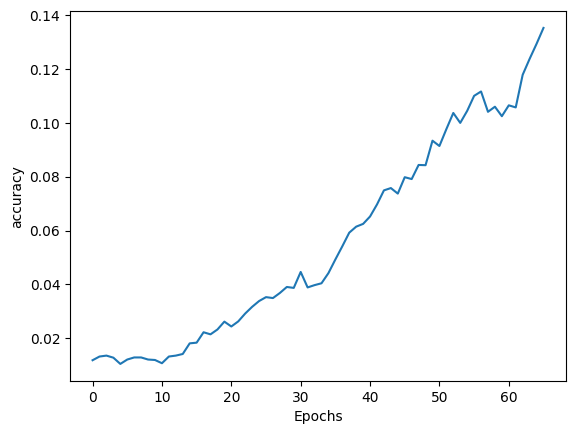

In [25]:
# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

In [26]:
# Define seed text
seed_text = "ሰላም ዛሬም ምድሪቱን"

# Define total words to predict and line settings
next_words = 50
words_per_line = 3
word_count = 0

# Loop until desired length is reached
for _ in range(next_words):

    # Generate the integer sequence of the current line
    sequence = vectorize_layer(seed_text)
    sequence = tf.keras.utils.pad_sequences([sequence], maxlen=max_sequence_len-1, padding='pre')

    # Predict next word
    probabilities = model.predict(sequence, verbose=0)
    predicted = np.argmax(probabilities, axis=-1)[0]

    if predicted != 0:
        output_word = vocabulary[predicted]
        seed_text += " " + output_word
        word_count += 1

        # Add a line break every N words
        if word_count % words_per_line == 0:
            seed_text += "\n"

# Print the result
print(seed_text)


ሰላም ዛሬም ምድሪቱን ያርሣል ሥቃይ ናቸው
 ለኛ ያለ ፀሀይ
 ያለ ሥቃይ ናቸው
 ለኛ ያለ ሥቡህ
 ጌታ ቅዱሥ ሥለሆነ
 ምሥጉን ሥለሆነ ምሥጉን
 ምን ሥቡህ ጌታ
 ቅዱሥ ብለህ ያለ
 ሥቡህ መሥቀል ይሻራል
 ያለ ሥቡህ ብሎ
 ከምከዳ መዳኛዬ የመዳን
 አለኝታ የዘላለም ሥላለ
 አለኝታ ይልቅ ተልኮ
 ተቋርሦ ትዝም ትዋጠኝ
 ንጉሥ ተማፅነናል በአበባ
 ተልኮ በኪዳኗ አትንሽኝ
 የመዳን ሆይ


In [ ]:
# Define seed text
seed_text = "መዘመር ልጀምር"

# Define total words to predict and line settings
next_words = 40
words_per_line = 5
word_count = 0

# Loop until desired length is reached
for _ in range(next_words):

    # Generate the integer sequence of the current line
    sequence = vectorize_layer(seed_text)
    sequence = tf.keras.utils.pad_sequences([sequence], maxlen=max_sequence_len-1, padding='pre')

    # Predict next word
    probabilities = model.predict(sequence, verbose=0)
    predicted = np.argmax(probabilities, axis=-1)[0]

    choice = np.random.choice([1,2,3])

    predicted = np.argsort(probabilities)[0][-choice]
    
    if predicted != 0:
        output_word = vocabulary[predicted]
        seed_text += " " + output_word
        word_count += 1

        # Add a line break every N words
        if word_count % words_per_line == 0:
            seed_text += "\n"

# Print the result
print(seed_text)
